# Superstore_Sales_Analysis_P_02

### Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:

df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
if df.duplicated().sum() > 0:
    print("Duplicate(s) found")
else:
    print("not found")

not found


### Skewness test 

In [7]:
numeric_cols = ["Sales", "Quantity", "Discount", "Profit"]



In [8]:
df[numeric_cols].skew()


Sales       12.972752
Quantity     1.278545
Discount     1.684295
Profit       7.561432
dtype: float64

### interpretations : can see that - 
* Sales is highly right skewed, meaning majority of the orders are of low value and very few are of high value ,median must be used for analyzing Sales
* Quantity is mildly skewed , safe to analyze with mean
* Discount is slighltly more skewed thaan Quantity , so median is preferred
* Profit is also highly right skewed , being one of the most unsatble metrics , median should be used

In [10]:
Q1 = df["Sales"].quantile(0.25)
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["Sales"] < lower) | (df["Sales"] > upper)]


In [14]:
outlier_perc=round((len(outliers) / len(df)) * 100,2)
print("percentage of outliers :" ,outlier_perc)

percentage of outliers : 11.68


### analyzing customer segments

In [15]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

**focus on the most prominent demographic of the customer segments to increase revenue**

In [16]:
for i in df['Segment'].unique():
    print(i)
    print(df[df['Segment'] == i].value_counts().count())

Consumer
5191
Corporate
3020
Home Office
1783


### Share of each customer type

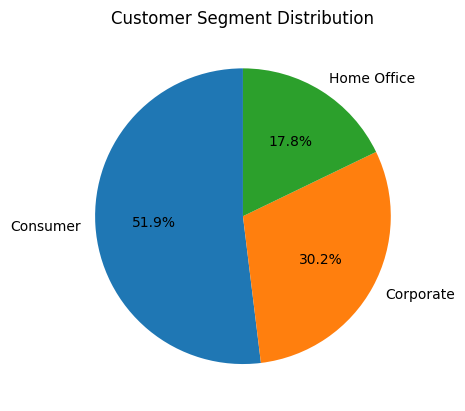

In [17]:
labels = ['Consumer', 'Corporate', 'Home Office']
sizes = [5191, 3020, 1783]


plt.figure()
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Customer Segment Distribution')
plt.show()








In [18]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()

In [19]:
sales_per_segment = sales_per_segment.reset_index()

sales_per_segment = sales_per_segment.rename(
    columns={'Segment': 'Types of Customer', 'Sales': 'Total Sales'}
)
print(sales_per_segment)

   index Types of Customer   Total Sales
0      0          Consumer  1.161401e+06
1      1         Corporate  7.061464e+05
2      2       Home Office  4.296531e+05


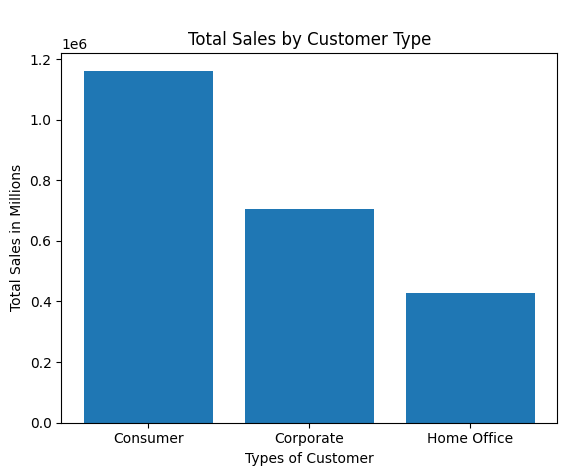

In [20]:
plt.bar(
    sales_per_segment['Types of Customer'],
    sales_per_segment['Total Sales']
)

plt.xlabel('Types of Customer')
plt.ylabel('Total Sales in Millions')
plt.title('\nTotal Sales by Customer Type')

plt.show()

In [21]:
labels_sales= ['Consumer', 'Corporate', 'Home Office']
segment_sales=sales_per_segment['Total Sales']

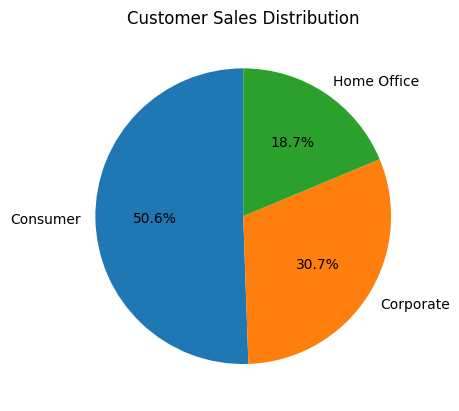

In [22]:
plt.figure()
plt.pie(
    segment_sales,
    labels=labels_sales,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Customer Sales Distribution')
plt.show()

In [23]:
# average and median of sales for each customer segment

In [24]:
df.groupby('Segment')['Sales'].agg(['mean','median'])


,mean,median
Segment,,
Consumer,223.733644,53.72
Corporate,233.823300,56.54
Home Office,240.972041,52.44


In [25]:
import seaborn as sns

sns.set_palette("Set2")


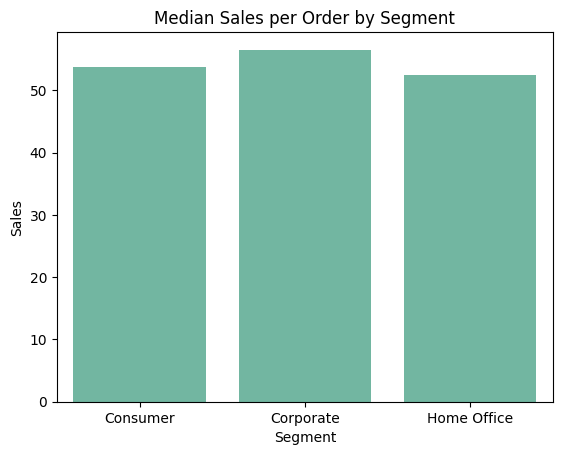

In [27]:
avg_sales = df.groupby('Segment')['Sales'].median().reset_index()

plt.figure()
sns.barplot(data=avg_sales, x='Segment', y='Sales')
plt.title('Median Sales per Order by Segment')
plt.show()


In [29]:
# Profit Margin(%) per Segment

In [30]:
prof_margin=df.groupby('Segment').apply(
    lambda x: x['Profit'].sum() / x['Sales'].sum(), include_groups=False
).reset_index(name='Profit Margin')


In [31]:
prof_margin

,Segment,Profit Margin
0,Consumer,0.115481
1,Corporate,0.130255
2,Home Office,0.140343


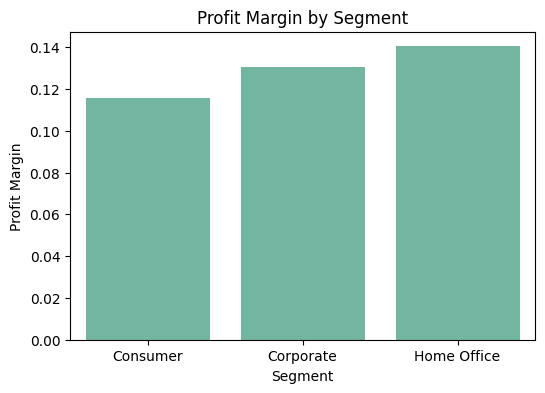

In [34]:
plt.figure(figsize=(6,4))

sns.barplot(
    data=prof_margin,
    x='Segment',
    y='Profit Margin'
)

plt.title('Profit Margin by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit Margin')

plt.show()


In [35]:
# Customer Segment by Demand 

In [36]:
demand = (
    df.groupby('Segment')
      .agg({
          'Quantity': 'sum',
          'Order ID': 'nunique',
          'Customer ID': 'nunique'
      })
      .reset_index()
      .rename(columns={
          'Quantity': 'Total Quantity',
          'Order ID': 'No. of Orders',
          'Customer ID': 'No. of Customers'
      })
)


In [37]:
demand

,Segment,Total Quantity,No. of Orders,No. of Customers
0,Consumer,19521,2586,409
1,Corporate,11608,1514,236
2,Home Office,6744,909,148


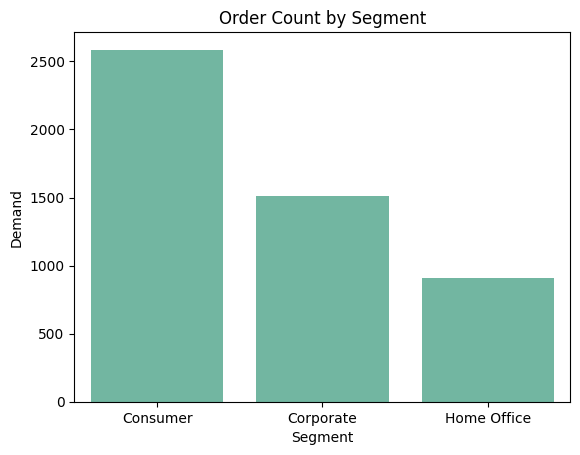

In [38]:
orders = df.groupby('Segment')['Order ID'].nunique().reset_index().rename(columns={'Order ID':'Demand'})
plt.figure()
sns.barplot(data=orders, x='Segment', y='Demand')
plt.title('Order Count by Segment')
plt.show()


In [29]:
# Discount Behavior Metrics

In [39]:
discount=df.groupby('Segment')['Discount'].median().reset_index()
discount

,Segment,Discount
0,Consumer,0.2
1,Corporate,0.2
2,Home Office,0.0


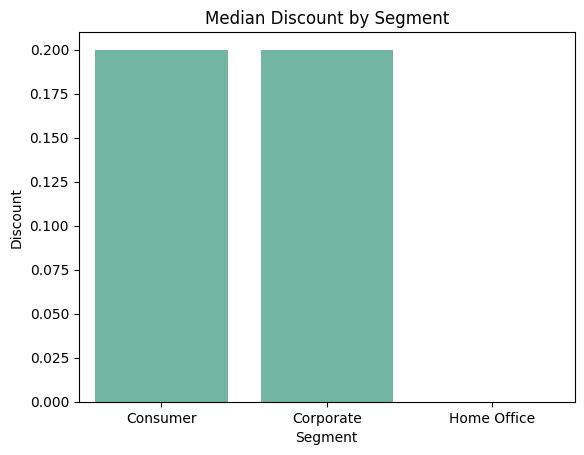

In [40]:
plt.figure()
sns.barplot(data=discount, x='Segment', y='Discount')
plt.title('Median Discount by Segment')
plt.show()


In [32]:
# Customer Segment Sales Rate per Customer

In [33]:
revenue_per_cust = df.groupby('Segment').apply(
    lambda x: x['Sales'].sum() / x['Customer ID'].nunique(),include_groups=False
).reset_index(name='Revenue per Customer')
revenue_per_cust

,Segment,Revenue per Customer
0,Consumer,2839.612090
1,Corporate,2992.145622
2,Home Office,2903.061814


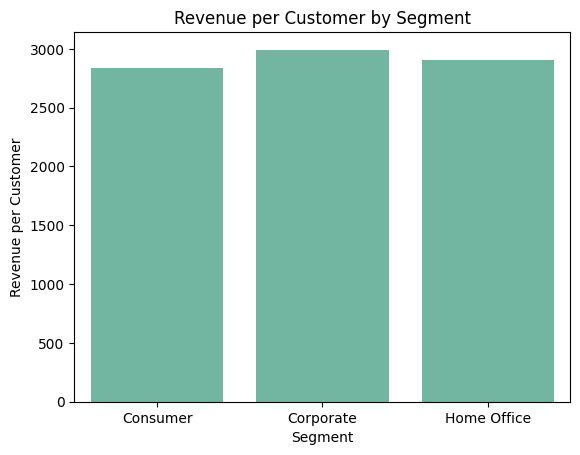

In [34]:
plt.figure()
sns.barplot(data=revenue_per_cust, x='Segment', y='Revenue per Customer')
plt.title('Revenue per Customer by Segment')
plt.show()

###  Repeated Customers/Cutomer Loyalty

In [35]:
cust_freq = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()

In [36]:
cust_freq=cust_freq.rename(columns={'Order ID':'Total Orders'})

In [37]:
cust_freq

,Customer ID,Customer Name,Segment,Total Orders
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [38]:
repeated_cust = cust_freq[cust_freq['Total Orders']>1]

In [39]:
repeated_cust_sorted = repeated_cust.sort_values(by='Total Orders',ascending=False)

In [40]:
repeated_cust_sorted.head(200)   # from here we can set a threshold for the minimum no. of orders to be considered as a repeated customer

,Customer ID,Customer Name,Segment,Total Orders
787,WB-21850,William Brown,Consumer,37
482,MA-17560,Matt Abelman,Home Office,34
387,JL-15835,John Lee,Consumer,34
606,PP-18955,Paul Prost,Home Office,34
349,JD-15895,Jonathan Doherty,Corporate,32
...,...,...,...,...
639,RF-19345,Randy Ferguson,Corporate,16
634,RD-19810,Ross DeVincentis,Home Office,16
268,EM-13825,Elizabeth Moffitt,Corporate,16
103,BP-11290,Beth Paige,Consumer,16


### High Value Customers

In [41]:
cust_sales=df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()

In [42]:
cust_sales

,Customer ID,Customer Name,Segment,Sales
0,AA-10315,Alex Avila,Consumer,5563.560
1,AA-10375,Allen Armold,Consumer,1056.390
2,AA-10480,Andrew Allen,Consumer,1790.512
3,AA-10645,Anna Andreadi,Consumer,5086.935
4,AB-10015,Aaron Bergman,Consumer,886.156
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,2374.658
789,YC-21895,Yoseph Carroll,Corporate,5454.350
790,YS-21880,Yana Sorensen,Corporate,6720.444
791,ZC-21910,Zuschuss Carroll,Consumer,8025.707


In [43]:
cust_sales_sorted=cust_sales.sort_values(by='Sales',ascending=False)

In [44]:
cust_sales_sorted.head(200)

,Customer ID,Customer Name,Segment,Sales
700,SM-20320,Sean Miller,Home Office,25043.0500
741,TC-20980,Tamara Chand,Corporate,19052.2180
621,RB-19360,Raymond Buch,Consumer,15117.3390
730,TA-21385,Tom Ashbrook,Home Office,14595.6200
6,AB-10105,Adrian Barton,Consumer,14473.5710
...,...,...,...,...
492,MC-17845,Michael Chen,Consumer,3805.7140
525,MM-17920,Michael Moore,Consumer,3794.0800
120,CA-11965,Carol Adams,Corporate,3789.7228
502,MG-17650,Matthew Grinstein,Home Office,3785.2760


### Checking whether if High Value Customers are also Loyal Customers or not ?

In [45]:
if 'Sean Miller' in repeated_cust_sorted.head(200)['Customer Name']:
    print("Yes")
else:
    print("No")

No


In [46]:
cust_sales_sorted["is_frequent_cust"] = cust_sales_sorted["Customer Name"].isin(repeated_cust_sorted["Customer Name"])


In [47]:
cust_sales_sorted

,Customer ID,Customer Name,Segment,Sales,is_frequent_cust
700,SM-20320,Sean Miller,Home Office,25043.050,True
741,TC-20980,Tamara Chand,Corporate,19052.218,True
621,RB-19360,Raymond Buch,Consumer,15117.339,True
730,TA-21385,Tom Ashbrook,Home Office,14595.620,True
6,AB-10105,Adrian Barton,Consumer,14473.571,True
...,...,...,...,...,...
659,RS-19870,Roy Skaria,Home Office,22.328,True
508,MG-18205,Mitch Gastineau,Corporate,16.739,True
145,CJ-11875,Carl Jackson,Corporate,16.520,False
456,LD-16855,Lela Donovan,Corporate,5.304,False


### finding which shipping method is the most reliable 

In [48]:
shipping_mode = df["Ship Mode"].value_counts().reset_index()
shipping_mode=shipping_mode.rename(columns={"index":"count"})
shipping_mode

,Ship Mode,count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


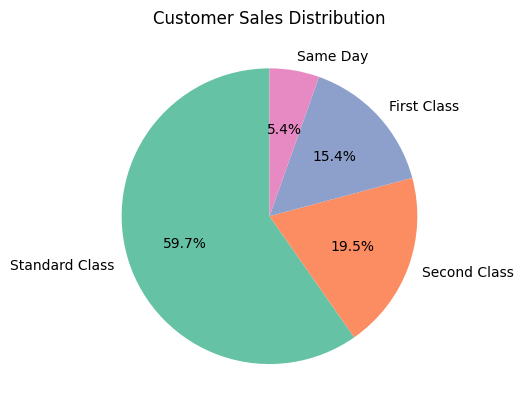

In [49]:
plt.figure()
plt.pie(
    shipping_mode["count"],
    labels=shipping_mode["Ship Mode"],
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Customer Sales Distribution')
plt.show()

In [50]:
# can help customers with recommendations about the most popular mode of shipping (can even go for product specific) ,
# so that they end up buying the item , as it helps them spend less and buy the item 
# also it will help the superstore save the cost of investment in improving their modes of shipping , can efficiently divert the resource towards the 
# the appropriatae mode(s) of shipping

## identifying the high potential areas / least potential areas

In [51]:
state=df["State"].value_counts().reset_index()
state=state.rename(columns={"count":"No. of Orders"})
state.sort_values(by="No. of Orders",ascending=False)
state.head(20)

,State,No. of Orders
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506
5,Illinois,492
6,Ohio,469
7,Florida,383
8,Michigan,255
9,North Carolina,249


In [52]:
city=df["City"].value_counts().reset_index()
city=city.rename(columns={"count":"No. of Orders"})
city.sort_values(by="No. of Orders",ascending=False)
city

,City,No. of Orders
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
526,Abilene,1
527,Montebello,1
528,Kissimmee,1
529,Danbury,1


In [53]:
city.head(200)

,City,No. of Orders
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
195,Mount Vernon,8
196,Irving,8
197,Vineland,8
198,Perth Amboy,8


In [54]:
state_sales=df.groupby("State")["Sales"].sum().reset_index()
state_sales.sort_values(by="Sales",ascending=False,inplace=True)
state_sales.head(20)

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140
8,Florida,89473.7080
11,Illinois,80166.1010
33,Ohio,78258.1360
20,Michigan,76269.6140
44,Virginia,70636.7200


In [55]:
# Merge orders & sales
orders_sales = state.merge(
    state_sales, on="State", how="left"
)

orders_sales


,State,No. of Orders,Sales
0,California,2001,457687.6315
1,New York,1128,310876.2710
2,Texas,985,170188.0458
3,Pennsylvania,587,116511.9140
4,Washington,506,138641.2700
5,Illinois,492,80166.1010
6,Ohio,469,78258.1360
7,Florida,383,89473.7080
8,Michigan,255,76269.6140
9,North Carolina,249,55603.1640


In [56]:
filtered = orders_sales[orders_sales["No. of Orders"] >= 200]

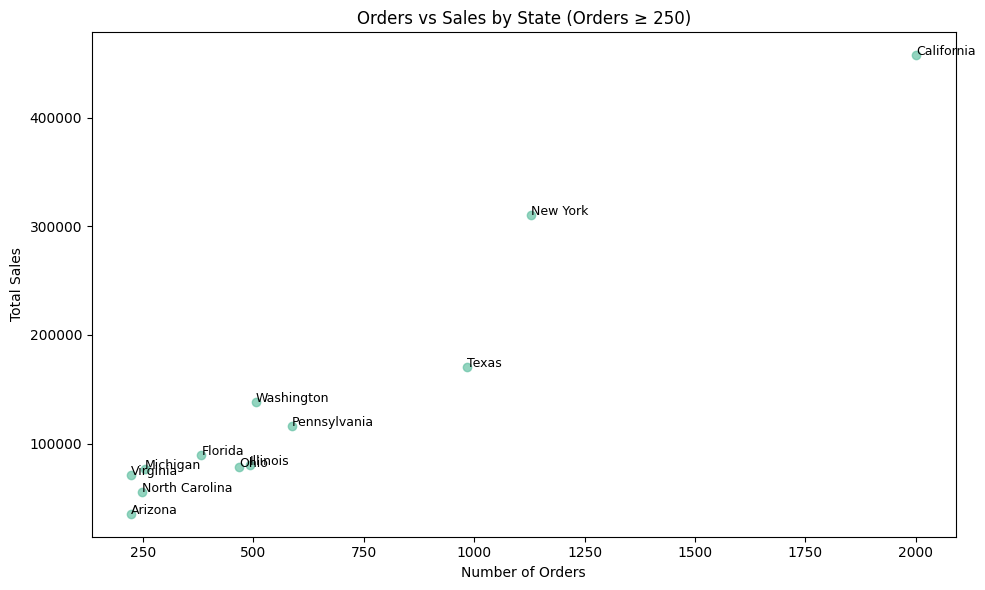

In [57]:
plt.figure(figsize=(10,6))


plt.scatter(
    filtered["No. of Orders"],
    filtered["Sales"],
    alpha=0.7
)

# Label all remaining states (since count is small now)
for _, row in filtered.iterrows():
    plt.text(
        row["No. of Orders"],
        row["Sales"],
        row["State"],
        fontsize=9
    )

plt.xlabel("Number of Orders")
plt.ylabel("Total Sales")
plt.title("Orders vs Sales by State (Orders ≥ 250)")
plt.tight_layout()
plt.show()

### interpretation : “For states with significant order volume (250+), sales increase with order count, but revenue efficiency varies across states.”

In [58]:
state_sales_profit=df.groupby("State")["Profit"].sum().reset_index()
state_sales_profit.sort_values(by="Profit",ascending=False,inplace=True)
state_sales_profit.head(20)

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


In [59]:
# can conclude that the least potential areas need more focus 
# that the superstore needs to keep satisfying the high potential cities , etc.

C:\Users\Pavitra\AppData\Roaming\Python\Python313\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


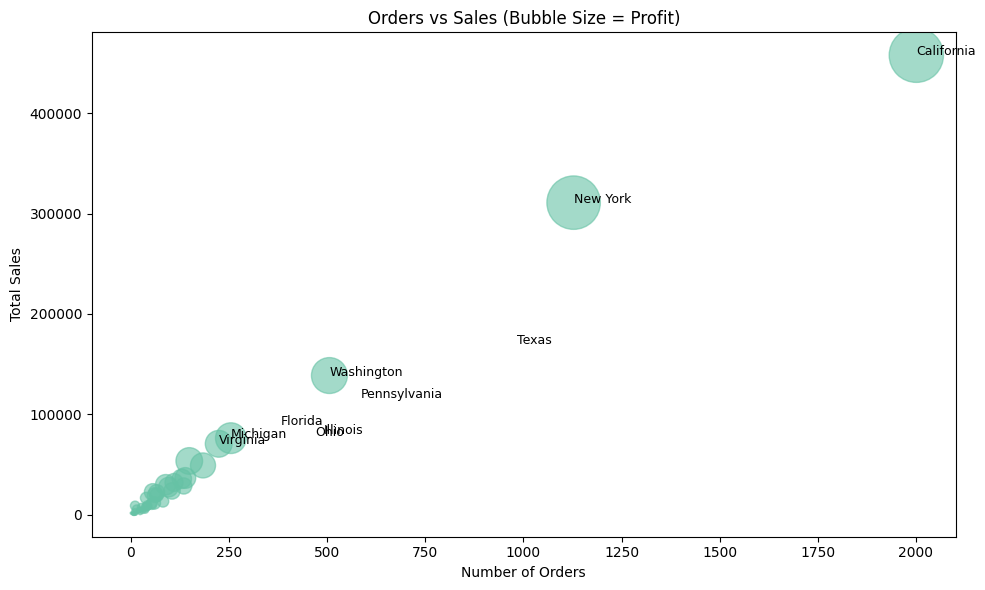

In [60]:
orders_sales_profit = (
    state.merge(state_sales, on="State")
          .merge(state_sales_profit, on="State")
)

plt.figure(figsize=(10,6))

plt.scatter(
    orders_sales_profit["No. of Orders"],
    orders_sales_profit["Sales"],
    s=orders_sales_profit["Profit"] / 50,
    alpha=0.6
)

for _, row in orders_sales_profit.sort_values("Sales", ascending=False).head(10).iterrows():
    plt.text(
        row["No. of Orders"],
        row["Sales"],
        row["State"],
        fontsize=9
    )

plt.xlabel("Number of Orders")
plt.ylabel("Total Sales")
plt.title("Orders vs Sales (Bubble Size = Profit)")
plt.tight_layout()
plt.show()


### interpretations:

- California has the most orders and sales, but profit grows slower compared to revenue.
- New York balances high sales with strong profit, showing better efficiency.
- Texas has many orders but lower sales and profit, suggesting smaller order values or heavy discounts.
- Washington and Pennsylvania generate good sales and profit with fewer orders, indicating higher-value customers.
- States in the bottom-left have low orders and low sales, so their overall impact is limited.

In [61]:
df_merg = state_sales.merge(state_sales_profit,on="State",how="left", suffixes=("_sales", "_profit"))

In [62]:
df_merg.head()

,State,Sales,Profit
0,California,457687.6315,76381.3871
1,New York,310876.2710,74038.5486
2,Texas,170188.0458,-25729.3563
3,Washington,138641.2700,33402.6517
4,Pennsylvania,116511.9140,-15559.9603


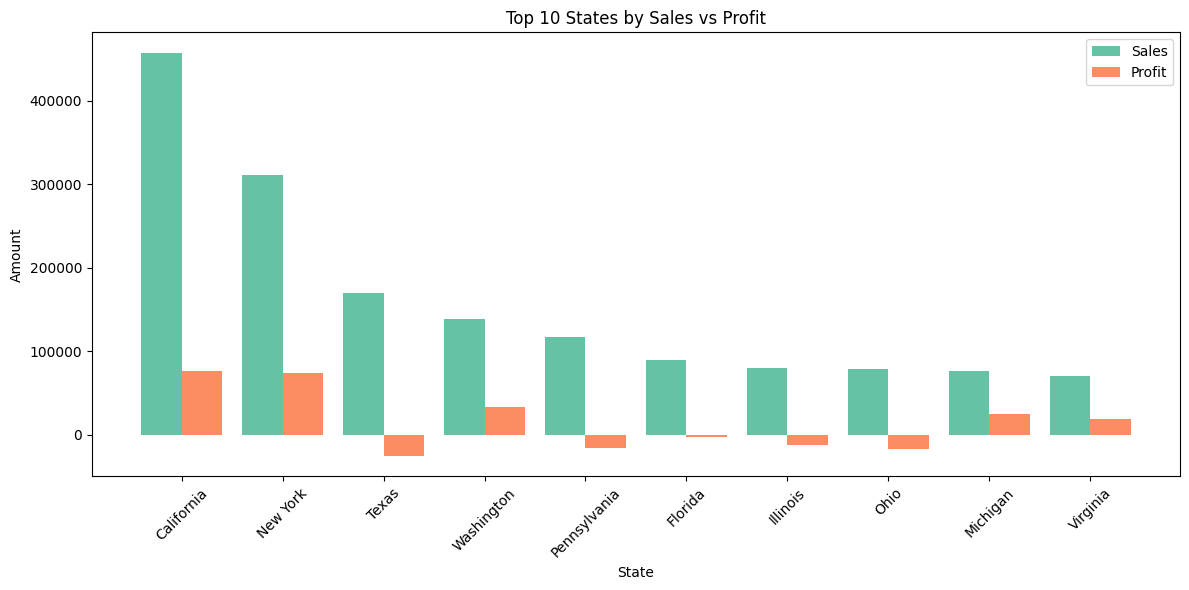

In [63]:
top10 = df_merg.sort_values("Sales", ascending=False).head(10)

x = np.arange(len(top10["State"]))
width = 0.4

plt.figure(figsize=(12,6))

plt.bar(x - width/2, top10["Sales"], width, label="Sales")
plt.bar(x + width/2, top10["Profit"], width, label="Profit")

plt.xticks(x, top10["State"], rotation=45)
plt.xlabel("State")
plt.ylabel("Amount")
plt.title("Top 10 States by Sales vs Profit")
plt.legend()

plt.tight_layout()
plt.show()

# interpretations

- California and New York generate the highest sales among all states.
- High sales do not always translate into high profit.
- Several states show low or even negative profit despite strong revenue.
- This indicates possible cost, discounting, or logistics inefficiencies in high-sales regions.

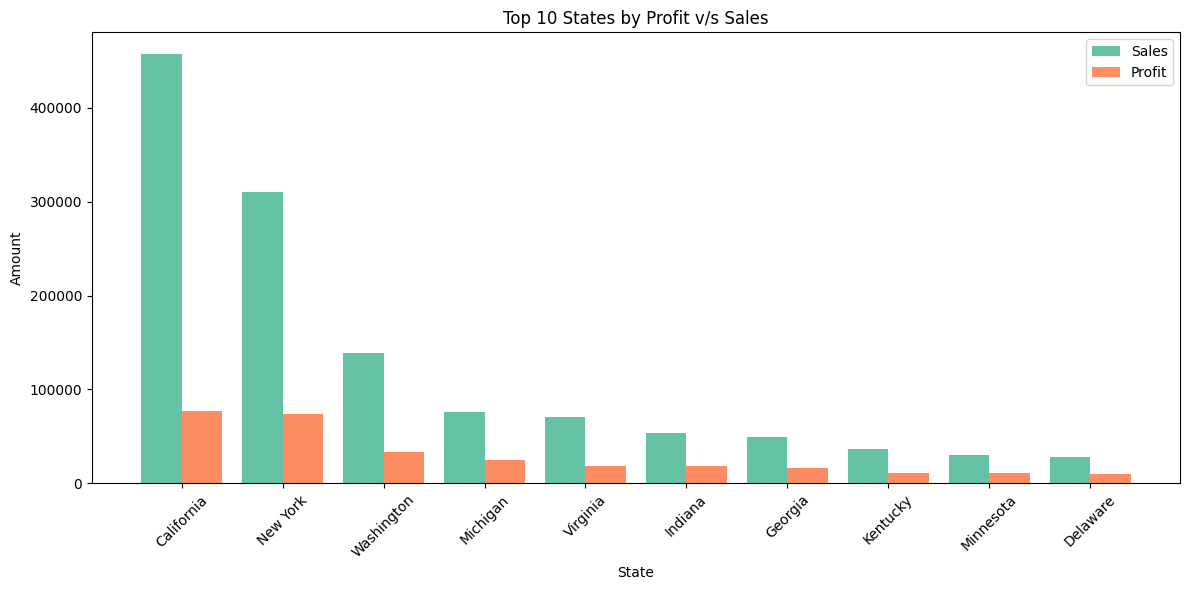

In [64]:
top10 = df_merg.sort_values("Profit", ascending=False).head(10)

x = np.arange(len(top10["State"]))
width = 0.4

plt.figure(figsize=(12,6))

plt.bar(x - width/2, top10["Sales"], width, label="Sales")
plt.bar(x + width/2, top10["Profit"], width, label="Profit")

plt.xticks(x, top10["State"], rotation=45)
plt.xlabel("State")
plt.ylabel("Amount")
plt.title("Top 10 States by Profit v/s Sales")
plt.legend()

plt.tight_layout()
plt.show()

# interpretations 

- Profit-based ranking differs significantly from sales-based ranking.
- States like Washington, Michigan, and Virginia generate strong profits with relatively lower sales.
- This highlights that operational efficiency matters more than sheer sales volume.
- Some high-sales states drop in ranking when profitability is considered.

### by profit margin(%)

In [65]:
top10["Profit_Margin_%"] = (top10["Profit"] / top10["Sales"]) * 100
top=top10[top10["Sales"]>=70000]
top

,State,Sales,Profit,Profit_Margin_%
0,California,457687.6315,76381.3871,16.688541
1,New York,310876.2710,74038.5486,23.816082
3,Washington,138641.2700,33402.6517,24.092863
8,Michigan,76269.6140,24463.1876,32.074618
9,Virginia,70636.7200,18597.9504,26.329012


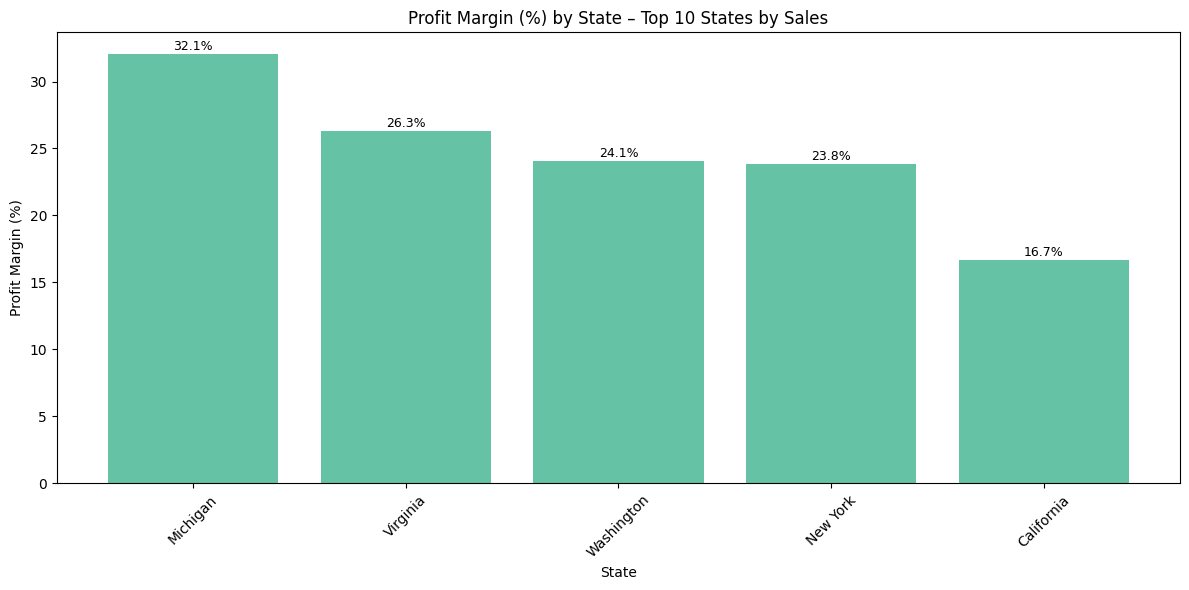

In [66]:
pm_sorted = top.sort_values("Profit_Margin_%", ascending=False)

plt.figure(figsize=(12,6))

plt.bar(pm_sorted["State"], pm_sorted["Profit_Margin_%"])

plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Profit Margin (%)")
plt.title("Profit Margin (%) by State – Top 10 States by Sales")

# Add value labels on top of bars
for i, v in enumerate(pm_sorted["Profit_Margin_%"]):
    plt.text(i, v + 0.3, f"{v:.1f}%", ha="center", fontsize=9)

plt.tight_layout()
plt.show()


# interpretations

- Michigan shows the highest profit margin, indicating strong efficiency.
- Virginia and Washington also maintain healthy profit margins.
- California, despite leading in sales, has a comparatively lower profit margin.
- High-margin states represent better long-term and scalable growth opportunities.

All states mapped OK.


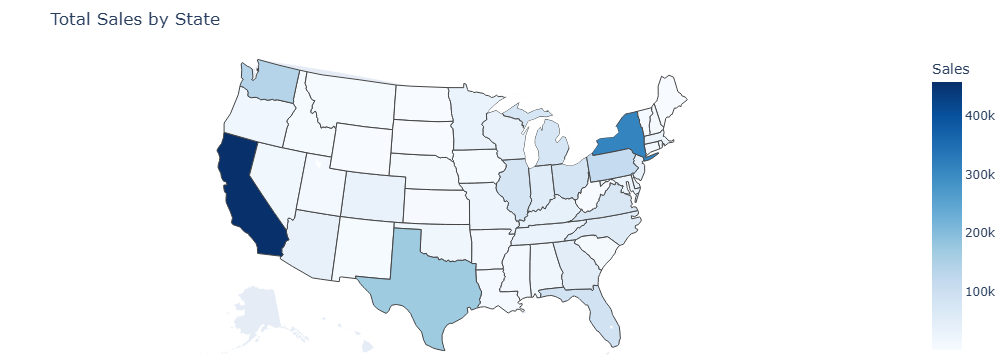

Interactive map saved to sales_by_state_map.html


In [86]:
# Plotly choropleth: Sales by US state
import pandas as pd
import plotly.express as px

# --- 1) state name -> USPS code map (50 states + DC) ---
state_abbrev = {
 'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
 'Colorado':'CO','Connecticut':'CT','Delaware':'DE','District of Columbia':'DC','Florida':'FL',
 'Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN',
 'Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME',
 'Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS',
 'Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH',
 'New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND',
 'Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI',
 'South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT',
 'Vermont':'VT','Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}

# --- 2) Clean state names (strip) and aggregate sales by state ---
df['State'] = df['State'].astype(str).str.strip()
state_sales = df.groupby('State', as_index=False)['Sales'].sum()

# --- 3) map full state name -> state code used by Plotly ---
state_sales['state_code'] = state_sales['State'].map(state_abbrev)

# show states that did not map (typos, territories, etc.)
missing = state_sales[state_sales['state_code'].isna()]
if not missing.empty:
    print("Unmapped states (check spelling or non-US regions):")
    print(missing[['State', 'Sales']].to_string(index=False))
else:
    print("All states mapped OK.")

# --- 4) Create choropleth (US map) ---
plot_df = state_sales.dropna(subset=['state_code']).copy()

fig = px.choropleth(
    plot_df,
    locations='state_code',            # 2-letter state codes
    locationmode='USA-states',         # tells Plotly we are mapping US states
    color='Sales',                     # column to color by
    hover_name='State',                # show full state name on hover
    scope='usa',
    color_continuous_scale='Blues',
    labels={'Sales': 'Total Sales'},
    title='Total Sales by State'
)

fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Sales")
)

fig.show()

# --- 5) Optional: save interactive html to share ---
fig.write_html("sales_by_state_map.html")
print("Interactive map saved to sales_by_state_map.html")


### interpretations for store expansion :

- California stands out as the top-performing state, clearly driving the highest sales. It’s a well-established market, so the focus here should be
on retaining customers, improving efficiency, and introducing premium offerings rather than pushing for rapid expansion.
- New York and Texas follow closely behind, showing strong demand and significant market potential. These states are good candidates for increasing 
  marketing efforts and strengthening distribution to capture more growth.
- States like Washington, Illinois, and Pennsylvania fall into a middle range, with steady sales and clear opportunities to grow further through more
  targeted campaigns or regional partnerships.
- Many central and southern states show lower sales levels, which could be due to lower brand awareness or limited reach. With the right local 
pricing, marketing, and expansion strategies, these regions could become meaningful growth markets over time.

## identifying the variations in the products/product categories

In [67]:
product=df["Category"].unique()
product

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [68]:
product_subcatg=df["Sub-Category"].unique()
product_subcatg

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [69]:
subcatg_count=df.groupby("Category")["Sub-Category"].nunique().reset_index()
subcatg_count

,Category,Sub-Category
0,Furniture,4
1,Office Supplies,9
2,Technology,4


In [70]:
subcatg_count_sales=df.groupby(["Category","Sub-Category"])["Sales"].sum().reset_index()
subcatg_count_sales=subcatg_count_sales.sort_values(by="Sales",ascending=False)
subcatg_count_sales

,Category,Sub-Category,Sales
16,Technology,Phones,330007.0540
1,Furniture,Chairs,328449.1030
11,Office Supplies,Storage,223843.6080
3,Furniture,Tables,206965.5320
6,Office Supplies,Binders,203412.7330
15,Technology,Machines,189238.6310
13,Technology,Accessories,167380.3180
14,Technology,Copiers,149528.0300
0,Furniture,Bookcases,114879.9963
4,Office Supplies,Appliances,107532.1610


In [71]:
catg_count=df.groupby("Category")["Sales"].sum().reset_index()
catg_count

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


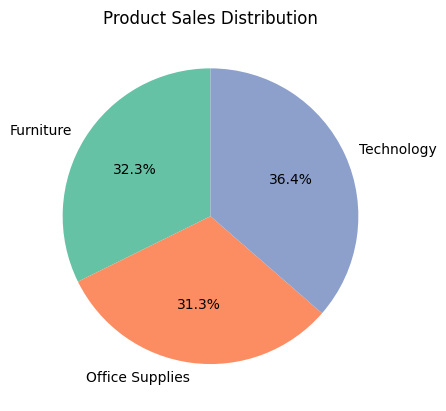

In [72]:
plt.figure()
plt.pie(
    catg_count["Sales"] ,
    labels=catg_count["Category"],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Product Sales Distribution")
plt.show()

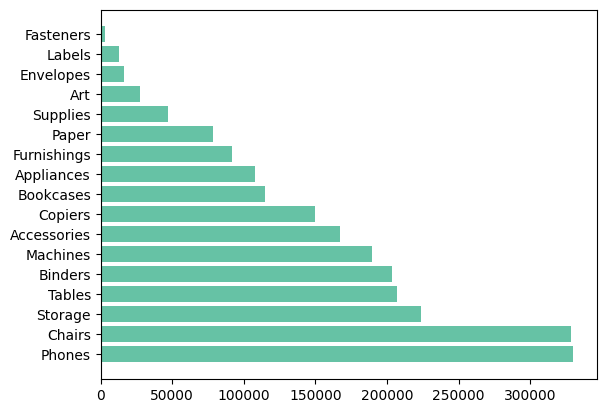

In [73]:
plt.barh(subcatg_count_sales["Sub-Category"],subcatg_count_sales["Sales"])
plt.show()

In [74]:
# can decide how to layout the store with products
# also can devisie a strategy to allocate the marketing resources towards the appropriate sub-category marketing

### Growth / Decline over time 

In [75]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

yearly_sales = (
    df.groupby(df["Order Date"].dt.year)["Sales"]
      .sum()
      .reset_index()
)

yearly_sales


,Order Date,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [76]:
yearly_sales=yearly_sales.rename(columns={"Order Date":"Year","Sales":"Total Yearly Sale"})
yearly_sales

,Year,Total Yearly Sale
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


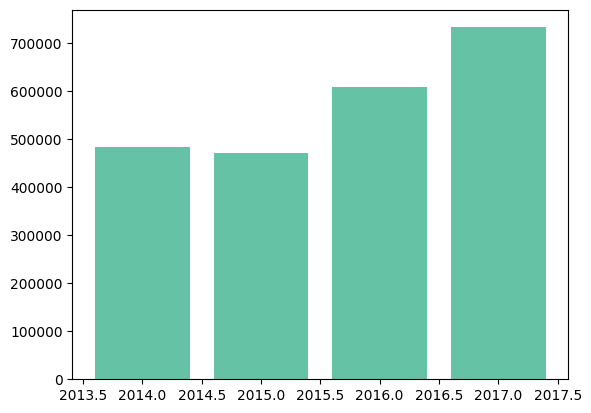

In [77]:
plt.bar(yearly_sales["Year"],yearly_sales["Total Yearly Sale"])
plt.show()

In [78]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

year_2018 = df[df["Order Date"].dt.year == 2017]

quarterly_sales = (
    year_2018
        .resample("QE", on="Order Date")["Sales"]
        .sum()
        .reset_index()
)

quarterly_sales


,Order Date,Sales
0,2017-03-31,123144.8602
1,2017-06-30,133764.3720
2,2017-09-30,196251.9560
3,2017-12-31,280054.0670


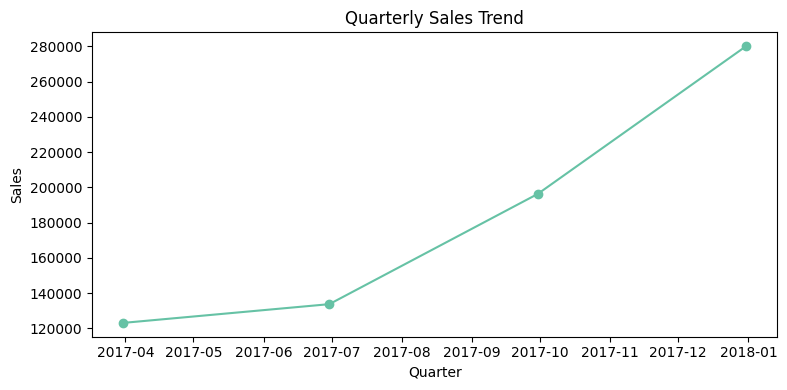

In [79]:
plt.figure(figsize=(8,4))
plt.plot(quarterly_sales["Order Date"], quarterly_sales["Sales"], marker="o")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Quarterly Sales Trend")
plt.tight_layout()
plt.show()


# interpretations :

- Sales show a steady upward trend across quarters.
- Growth is modest in the first half of the year indicating perhaps a poor marketing starategy but accelerates sharply in later quarters.
- The highest sales occur in the final quarter, suggesting strong year-end demand.
- This pattern may indicate seasonality, such as festive or holiday-driven sales.

In [82]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

monthly_sales = (
    df.resample("M", on="Order Date")["Sales"]
      .sum()
      .reset_index()
      .rename(columns={
          "Order Date": "Month",
          "Sales": "Total Monthly Sales"
      })
)

monthly_sales


C:\Users\Pavitra\AppData\Local\Temp\ipykernel_23664\454152096.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M", on="Order Date")["Sales"]


,Month,Total Monthly Sales
0,2014-01-31,14236.8950
1,2014-02-28,4519.8920
2,2014-03-31,55691.0090
3,2014-04-30,28295.3450
4,2014-05-31,23648.2870
5,2014-06-30,34595.1276
6,2014-07-31,33946.3930
7,2014-08-31,27909.4685
8,2014-09-30,81777.3508
9,2014-10-31,31453.3930


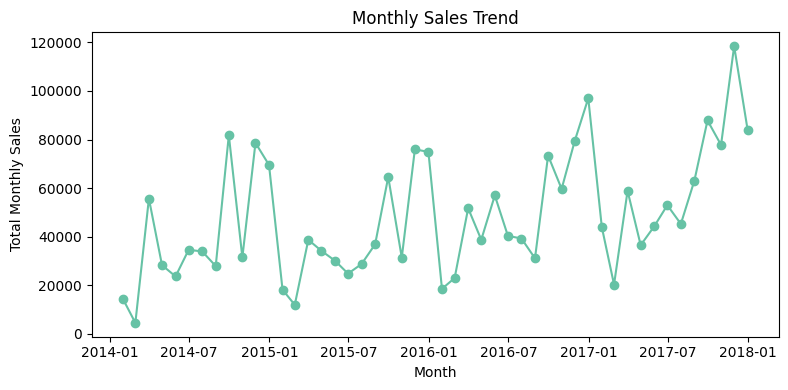

In [84]:
plt.figure(figsize=(8,4))
plt.plot(
    monthly_sales["Month"],
    monthly_sales["Total Monthly Sales"],
    marker="o"
)

plt.xlabel("Month")
plt.ylabel("Total Monthly Sales")
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()


### interpretations :

 - The sales trend shows a recurring pattern where sales are generally lower during the middle months of the year and rise sharply toward the end of
   the year.
 -   Even with these ups and downs, monthly sales show a clear upward movement over time, suggesting steady overall growth.
 - The strongest sales consistently appear toward the year-end, which is likely influenced by festive seasons and higher customer spending.
 -  Based on this pattern, the business could focus more on promotional offers and marketing efforts during slower months, while preparing inventory 
    and pricing strategies in advance for high-demand periods.

# END